# SI 370 - Homework 2: Pandas Hands-on Experience

## Please fill in...
### * Your name: William Juang
### * People you worked with: 

**Objectives:**

This week we want to get some hands-n experience with Pandas operations, including:
- basic data loading
- selection of various sorts (including various string matches)
- plotting (but mostly to validate selections)
- basic aggregations (value_counts)
- groupby/stack
- basic indexing/joins
- creation and modification of columns (including string modification)

Our main purpose is to review what we have already covered in the class and try the same analysis on other datasets.

<h3><font color='red'>Hint: Many of these problems a VERY close to what we worked through in the lab on 1/19. If you're stuck, double check the notes</font></H3>

## **Submission Instructions:**
After completing this homework, you should turn in two files via SI 370 001 WN 2017 -> Assignments:
1. A Jupyter Notebook file named hw2-YOUR_UNIQUE_NAME.ipynb.  Please observe the following requirements:
    * This file should show all of the required work, including code, results, visualizations (if any), and necessary comments to your code.
    * You should use Markdown cells to enclose all textual content, including explanations, discoveries, and conclusions. Do not include such content unless required.
    * Irrelevant code and results should be deleted prior to submission.
2. An html file named hw2-YOUR_UNIQUE_NAME.html showing the preview of the above Jupyter Notebook. To create this file, select File -> Download as HTML. We want this in case something breaks when we load your notebook.  This will let us see what you saw when you were done.

## 1. Setup Jupyter Environment
The configuration of Anaconda and Jupyter was covered in [Lab 1: Setup IPython Environment](https://docs.google.com/document/d/1mIl3xVq2jPh11c5xu_OHlv9N5q45gbYyCs5LHWLsFNY/edit?usp=sharing) (on Thursday January 05, 2017). We assume you have completed or reviewed all the required tasks in Lab 1 before attempting this homework.

We need to do the same setup as we had in lab 3. So just copy whatever library you imported in lab 3.

In [3]:
# load a few libraries we'll need

%matplotlib inline
import pandas as pd
import random
import numpy as np
from random import sample

Next, setup your Jupyter Notebook display to use the same css files as we used in lab 3. Note: You do not need to attach the css files to your assignment. We will use the same css files in the folder of your assignment and your code should work.

In [4]:
# make the Pandas tables a little more readable

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

## 2. Slicing and Sorting

In homework 1, we used the names dataset and learned how to do basic statistical analysis and report the Summary Statistics. In this assignment, we want to return to the names dataset, but this time do more interesting analysis on it.  This will give you a bit more practice with series/dataframe selection.

For this purpose, we should first load the names dataset again.

In [5]:
df_1995 = pd.read_csv('names/yob1995.txt')
df_1995.head()

,name,gender,birth_count
0,Deziray,F,8
1,Nafis,M,11
2,Christan,F,52
3,Adeel,M,8
4,Nicolo,M,30


Answer the following questions using proper Pandas operations. Both your code and results should be included in your submitted Jupyter Notebook (same below). All the questions in this section involve **df_1995** only.

(a) What are the 10 most popular names in 1995?

Note that part f of question 3b in homework 1 asked us something similar. But now that we learned more about Pandas, we can answer it in a more efficient and easier way.

In [6]:
df_1995.sort_values('birth_count', ascending=False).head(10)

,name,gender,birth_count
25236,Michael,M,41403
7446,Matthew,M,32874
24365,Christopher,M,32668
16553,Jacob,M,31122
16986,Joshua,M,30715
16349,Nicholas,M,29156
22273,Tyler,M,29153
13046,Jessica,F,27938
23033,Brandon,M,26901
3026,Daniel,M,26702


(b) What are the 10 most popular boys' names in 1995?

In [7]:
males = df_1995
males = df_1995[df_1995.gender == "M"]
males.sort_values('birth_count', ascending=False).head(10)

,name,gender,birth_count
25236,Michael,M,41403
7446,Matthew,M,32874
24365,Christopher,M,32668
16553,Jacob,M,31122
16986,Joshua,M,30715
16349,Nicholas,M,29156
22273,Tyler,M,29153
23033,Brandon,M,26901
3026,Daniel,M,26702
2393,Austin,M,25906


(c) What are the 10 most popular girls' names in 1995?

In [8]:
females = df_1995
females = df_1995[df_1995.gender == "F"]
females.sort_values('birth_count', ascending=False).head(10)

,name,gender,birth_count
13046,Jessica,F,27938
23171,Ashley,F,26603
12165,Emily,F,24377
19798,Samantha,F,21646
15869,Sarah,F,21365
5046,Taylor,F,20424
17535,Hannah,F,17012
1811,Brittany,F,16477
13226,Amanda,F,16344
10566,Elizabeth,F,16183


(d) What is the average birth_count of all names in 1995?

In [9]:
df_1995.birth_count.mean()

140.36652607361964

(e) What is the median birth_count of boys' names in 1995?

In [10]:
df_1995.birth_count.median()

11.0

(f) What is the maximum birth_count of girls' names in 1995?

In [11]:
girls = df_1995
girls = df_1995[df_1995.gender == "F"]
girls.birth_count.value_counts().head(1)

5    2370
Name: birth_count, dtype: int64

## 3. Grouping, Pivoting, and Merging

The following questions involve **df_all** only. "#" is short for "number of."

In [134]:
# we're going to move to the full dataset now.
dfs = []
years = range(1880, 2015)
for y in years:
    df = pd.read_csv('names/yob%d.txt' % y)
    df['year'] = y
    dfs.append(df)
df_all = pd.concat(dfs, ignore_index=True)
df_all.head()

,name,gender,birth_count,year
0,Simeon,M,23,1880
1,Raoul,M,7,1880
2,Lou,M,14,1880
3,Myra,F,83,1880
4,Alois,M,10,1880


(a) What is the total #births for each year?

In [13]:
df_all.groupby('year').sum()

,birth_count
year,
1880,201484
1881,192699
1882,221538
1883,216950
1884,243467
1885,240855
1886,255319
1887,247396
1888,299480


(b) What is the total #births for each year for each gender?

In [14]:
df_all.groupby(['year', 'gender']).sum()

birth_count
year gender             
1880 F             90993
     M            110491
1881 F             91954
     M            100745
1882 F            107850
     M            113688
1883 F            112321
     M            104629
1884 F            129022
     M            114445
1885 F            133055
     M            107800
1886 F            144535
     M            110784
1887 F            145982
     M            101414
1888 F            178627
     M            120853
1889 F            178366
     M            110584
1890 F            190377
     M            111025
1891 F            185482
     M            101196
1892 F            212346
     M            122037
1893 F            212906
     M            112317
1894 F            222922
     M            115772
...                  ...
2000 F           1814601
     M           1962406
2001 F           1799049
     M           1941251
2002 F           1795206
     M           1939815
2003 F           1825359
     M           1973434
2004 F           1834145
     M           1982794
2005 F           1845379
     M           1994841
2006 F           1898463
     M           2052377
2007 F           1919408
     M           2072139
2008 F           1887234
     M           2036289
2009 F           1832925
     M           1979303
2010 F           1772738
     M           1913851
2011 F           1753500
     M           1893230
2012 F           1753922
     M           1889414
2013 F           1745339
     M           1881463
2014 F           1768775
     M           1901376

[270 rows x 1 columns]

(c) Which year has the maximum total #births?  Hint: use .ix(...) to select the right "row" (the max)

In [15]:
maxbirth = df_all.groupby(['year']).sum()
maxbirth.ix[[np.argmax(maxbirth.birth_count)]]

,birth_count
year,
1957,4200026


(d) Which year has the maximum total #births for boys? Hint: use .ix(...) to select the right "row" (the max)

In [16]:
malemax = df_all[df_all.gender == 'M']
malemax = malemax.groupby(['year']).sum()
malemax.ix[[np.argmax(maxbirth.birth_count)]]

,birth_count
year,
1957,2155866


(e) Which year has the biggest difference between #boys and #girls (i.e., abs(#boys-#girls))? Hint: use .ix(...) to select the right "row" (the max)

In [22]:
bvg = df_all.pivot_table(index = "year", columns = "gender", aggfunc=np.sum)

np.argmax(abs(bvg['birth_count']['M'] - bvg['birth_count']['F']))

1910

(f) What are the 5 most popular boys' names in the 1990s (1990-1999)?

In [49]:
popboy = df_all[df_all.year // 10 * 10 == 1990]
popboy = popboy[popboy.gender == "M"]
popboy = popboy.groupby('name').sum().sort_values('birth_count', ascending=False).head(5)
popboy.year = '1990s'
popboy

,birth_count,year
name,,
Michael,462278,1990s
Christopher,360176,1990s
Matthew,351580,1990s
Joshua,329082,1990s
Jacob,298249,1990s


(g) What are the 5 most popular girls' names in the 20th century (1901-2000)?

In [50]:
popgirl = df_all[df_all.year // 10 * 10 == 1990]
popgirl = popgirl[popgirl.gender == "F"]
popgirl = popgirl.groupby('name').sum().sort_values('birth_count', ascending=False).head(5)
popgirl.year = '1990s'
popgirl

,birth_count,year
name,,
Jessica,303060,1990s
Ashley,301779,1990s
Emily,237211,1990s
Sarah,224222,1990s
Samantha,223980,1990s


(h) Define the gender neutrality of a name as 

                                    min(#boys, #girls). 

In other words, if the number of all the births for Jodan, 10000 were Male and, 5000 were Female, the "neturality" score would be min(10000,5000) --> 5000

What are the 15 names with the highest gender neutrality in the 1990s?

In [183]:
genderneutral = df_all[df_all.year // 10 * 10 == 1990]
genderneutral = genderneutral.groupby(by = ['gender', 'name']).birth_count.sum()
genderneutral = genderneutral.unstack('gender').fillna(0)
genderneutral['GenderNeutrality'] = genderneutral.loc[:, ['F', 'M']].min(axis = 1)
genderneutral.sort_values(by = 'GenderNeutrality', ascending=False).head(15)

gender,F,M,GenderNeutrality
name,,,
Jordan,61742.0,144719.0,61742.0
Taylor,169010.0,58392.0,58392.0
Casey,25895.0,29244.0,25895.0
Angel,19496.0,36980.0,19496.0
Alexis,131174.0,16253.0,16253.0
Dominique,23642.0,10980.0,10980.0
Riley,10230.0,18833.0,10230.0
Morgan,91179.0,10098.0,10098.0
Bailey,31614.0,9924.0,9924.0


## 4. Making Simple Plots

(a) Plot the total #births by gender and year, as below.
![Total Births by Gender and Year](TotalBirthsByGenderYear.PNG)

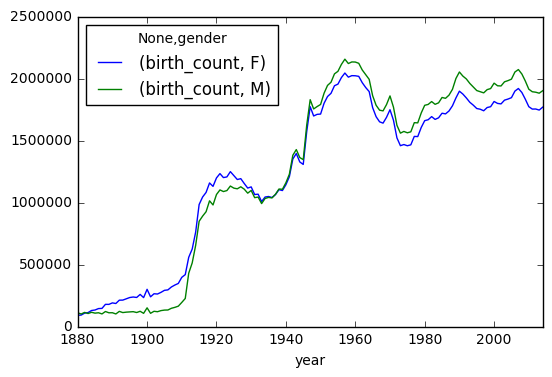

In [404]:
totbirth = df_all
totbirth = totbirth.groupby(['year','gender']).sum()
totbirth = totbirth.unstack('gender')
totbirth.plot()

(b) Plot the proportion of the name "Mike" among all male names by year, as below.
![Portion of Mike Among Boys Names](PortionOfMikeAmongBoysNames.PNG)

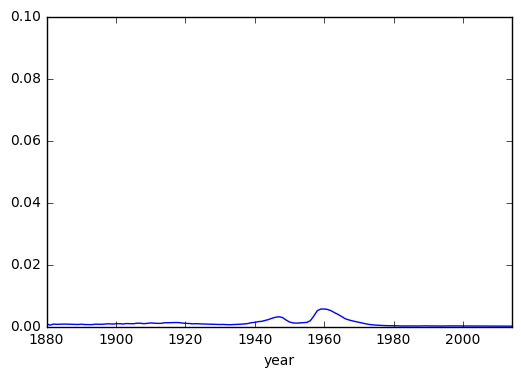

In [445]:
df_malemike = df_all[df_all.gender == "M"]
df_malemike = df_malemike[df_malemike.name == "Mike"].sort_values(by ="year")
df_male = df_all[df_all.gender == "M"].groupby('year').sum()
df_malemike = df_malemike.set_index('year')
(df_malemike.birth_count / df_male.birth_count).plot(ylim=[0,.1])

## 5. Comic Characters

Let's work on a more interesting dataset. We need to download "comic_characters.csv" dataset from Canvas > SI 370 001 WN 2017 > Files > Homeworks. The original dataset is available at ["Comic Books Are Still Made By Men, For Men And About Men"] (http://fivethirtyeight.com/features/women-in-comic-books/).

Then, we should load the dataset as we did with other datasets before, though this time we use the column "id" as the index as we load our dataframe.

In [299]:
comicCharacters = pd.DataFrame.from_csv('comic_characters.csv', index_col="id")

# publisher: Comic publisher: e.g., DC Comics or Marvel.
# name: The name of the character.
# identity: The identity statusof the character (Secret Identity, Public identity, [on marvel only: No Dual Identity]).
# align: If the character is Good, Bad or Neutral.
# eye: Eye color of the character.
# hair: Hair color of the character.
# sex: Sex of the character (e.g. Male, Female, etc.)
# alive: If the character is alive or deceased.
# appearances: The number of appareances of the character in comic books.
# first_appearance: The month and year of the character’s first appearance in a comic book, if available.
# month: The month of the character’s first appearance in a comic book, if available.
# year: The year of the character’s first appearance in a comic book, if available.
# date: The date of the character’s first appearance in a comic book, if available.

The very first thing we need to do is to simply look at the first rows of the dataset to figure out how the data looks like.

In [300]:
comicCharacters.head()

,publisher,name,Identity,align,eye,hair,sex,alive,appearances,first_appearance,month,year,date
id,,,,,,,,,,,,,
1,Marvel,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,"1962, August",August,1962.0,8/1/1962
2,Marvel,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Living Characters,3360.0,"1941, March",March,1941.0,3/1/1941
3,Marvel,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3061.0,"1974, October",October,1974.0,10/1/1974
4,Marvel,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2961.0,"1963, March",March,1963.0,3/1/1963
5,Marvel,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,2258.0,"1950, November",November,1950.0,11/1/1950


There are two points to consider in the head of the dataframe:
* We have already defined "id" as the index.
* Compare the values in each column and the description of the column in the previous cell.

(a) What is the total number of appearances of characters for each publisher? (Note: this is not asking for the number of unique characters but the number of appearances, each character *appears* multiple times, for example Thor appears 2258 times)

In [315]:
char = comicCharacters
char = comicCharacters.groupby(['publisher', 'name'])['appearances'].sum().to_frame().fillna(0)
char.sort_values('appearances', ascending=False)


appearances
publisher name                                                           
Marvel    Spider-Man (Peter Parker)                                4043.0
          Captain America (Steven Rogers)                          3360.0
DC        Batman (Bruce Wayne)                                     3093.0
Marvel    Wolverine (James \"Logan\" Howlett)                      3061.0
          Iron Man (Anthony \"Tony\" Stark)                        2961.0
DC        Superman (Clark Kent)                                    2496.0
Marvel    Thor (Thor Odinson)                                      2258.0
          Benjamin Grimm (Earth-616)                               2255.0
          Reed Richards (Earth-616)                                2072.0
          Hulk (Robert Bruce Banner)                               2017.0
          Scott Summers (Earth-616)                                1955.0
          Jonathan Storm (Earth-616)                               1934.0
          Henry McCoy (Earth-616)                                  1825.0
          Susan Storm (Earth-616)                                  1713.0
DC        Green Lantern (Hal Jordan)                               1565.0
Marvel    Namor McKenzie (Earth-616)                               1528.0
          Ororo Munroe (Earth-616)                                 1512.0
          Clinton Barton (Earth-616)                               1394.0
          Matthew Murdock (Earth-616)                              1338.0
DC        James Gordon (New Earth)                                 1316.0
Marvel    Stephen Strange (Earth-616)                              1307.0
          Mary Jane Watson (Earth-616)                             1304.0
          John Jonah Jameson (Earth-616)                           1266.0
          Robert Drake (Earth-616)                                 1265.0
DC        Richard Grayson (New Earth)                              1237.0
Marvel    Henry Pym (Earth-616)                                    1237.0
          Charles Xavier (Earth-616)                               1233.0
DC        Wonder Woman (Diana Prince)                              1231.0
Marvel    Warren Worthington III (Earth-616)                       1230.0
          Piotr Rasputin (Earth-616)                               1162.0
...                                                                   ...
          Ch'od (War Skrull) (Earth-616)                              0.0
          Ch'rith (Earth-616)                                         0.0
          Cha'sa'dra (Earth-616)                                      0.0
          Chandra (Centaurian) (Earth-616)                            0.0
          Chandra O'Keefe (Earth-616)                                 0.0
          Charles Barnabus (Earth-616)                                0.0
          Charles Huckle (Earth-616)                                  0.0
          Charles Xavier (Infinity War Doppelganger) (Ear...          0.0
          Charles Xavier (Masque's Doppelganger) (Earth-616)          0.0
          Charles Xavier (X-Sentinel) (Earth-616)                     0.0
          Cheng-Ho (Earth-616)                                        0.0
          Chief O'Grady (Earth-616)                                   0.0
          Solomon O'Sullivan (Earth-616)                              0.0
          Chris Reichert (Earth-616)                                  0.0
          Conner O'Reilly (Heroes Reborn) (Earth-616)                 0.0
          Chulyen (Earth-616)                                         0.0
          Cisa (Earth-616)                                            0.0
          Sniper (Earth-616)                                          0.0
          Claude Unger (Earth-616)                                    0.0
          Cleito (Earth-616)                                          0.0
          Cliff Garner (Earth-616)                                    0.0
          Sn'Tlo (Earth-616)                                      

(b) What is the total number of appearances of characters by each publisher in each year? Output a table.

In [336]:
charyear = comicCharacters
charyear = comicCharacters.groupby(['publisher', 'name', 'year'])['appearances'].sum().to_frame()
charyear = charyear.unstack('year').fillna(0)
charyear


appearances  \
year                                                              1935.0   
publisher name                                                             
DC        3g4 (New Earth)                                            0.0   
          500-ZQ (New Earth)                                         0.0   
          A'Hwiirdh-Paan'A (New Earth)                               0.0   
          A'monn A'mokk (New Earth)                                  0.0   
          A'morr (New Earth)                                         0.0   
          A-Mortal (New Earth)                                       0.0   
          A.J. (New Earth)                                           0.0   
          AR-N-O-Q (New Earth)                                       0.0   
          AWOL (New Earth)                                           0.0   
          Aa (New Earth)                                             0.0   
          Aarden (New Earth)                                         0.0   
          Aaron Babcock (New Earth)                                  0.0   
          Aaron Cash (New Earth)                                     0.0   
          Aaron Hayley (New Earth)                                   0.0   
          Aaron Helzinger (New Earth)                                0.0   
          Aaron Jase (New Earth)                                     0.0   
          Aaron Langstrom (New Earth)                                0.0   
          Abdul Smith (New Earth)                                    0.0   
          Abe Crane (New Earth)                                      0.0   
          Abednego Danner (New Earth)                                0.0   
          Abel (New Earth)                                           0.0   
          Abel Tarrant (New Earth)                                   0.0   
          Abigail Arcane (New Earth)                                 0.0   
          Abigail Hunkel (New Earth)                                 0.0   
          Abigail Moorland (New Earth)                               0.0   
          Abin Sur (New Earth)                                       0.0   
          Able Crown (New Earth)                                     0.0   
          Abnegazar (New Earth)                                      0.0   
          Abner Girdler (New Earth)                                  0.0   
          Abner Krill (New Earth)                                    0.0   
...                                                                  ...   
Marvel    Zorba (Earth-616)                                          0.0   
          Zorka (Earth-616)                                          0.0   
          Zoro (Earth-616)                                           0.0   
          Zoroaster (Earth-616)                                      0.0   
          Zoroba (Earth-616)                                         0.0   
          Zorr (Android) (Earth-616)                                 0.0   
          Zorr (Luphomoid) (Earth-616)                               0.0   
          Zota of Pergamum (Earth-616)                               0.0   
          Zotarr (Earth-616)                                         0.0   
          Zoya Vasilievna (Earth-616)                                0.0   
          Zreate'th (Earth-616)                                      0.0   
          Zsaji (Earth-616)                                          0.0   
          Zubar (Legion Personality) (Earth-616)                     0.0   
          Zuchan (Earth-616)                                         0.0   
          Zuhn (Earth-616)                                           0.0   
          Zuko (Earth-616)                                           0.0   
          Zuni (Earth-616)                                           0.0   
          Zuras (Earth-616)                                          0.0   
          Zuri (Earth-616)                                           0.0   
          Zuzha Yu (Earth-616)   

(c) As you can see, it is difficult to figure out any trend in appearances of characters of each publisher in each year. However, since you know data visualization, you can plot the time trend for each publisher separately and compare them. Plot a time series of appearances over time (one time series for each publisher).

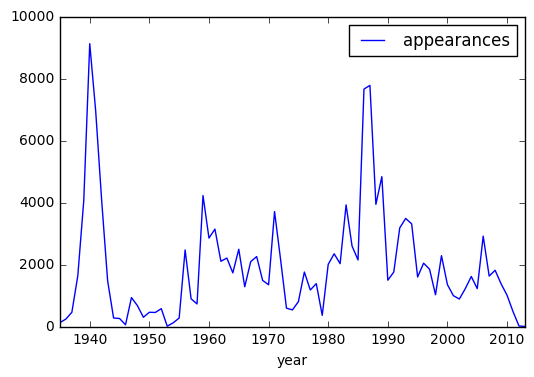

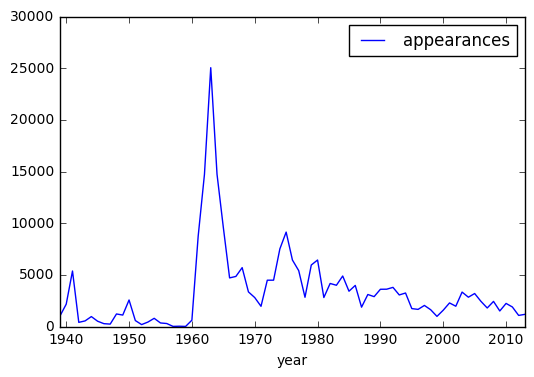

In [456]:
DCplot = comicCharacters[comicCharacters.publisher == "DC"]
DCplot = DCplot.groupby(['year']).sum()
DCplot.plot()

Marplot = comicCharacters[comicCharacters.publisher == "Marvel"]
Marplot = Marplot.groupby(['year']).sum()
Marplot.plot()

(d) Which *hair* color has the maximum total appearances all over the years?  Produce the output as a single row from a Series.

In [392]:
hair = comicCharacters
hair = comicCharacters.groupby(['hair'])['appearances'].sum().to_frame().fillna(0)
hair = hair.sort_values('appearances', ascending=False).head(1)
hair.ix['Black Hair']

appearances    110126.0
Name: Black Hair, dtype: float64

(e) Someone has given you the following lines of code. Break it down into multiple steps as we did in the lecture. Explain the function in each step and whether it processes a dataframe or series. Also if it generates a dataframe or series.

In [457]:
c = comicCharacters[comicCharacters.sex == 'Male Characters'] # this filters out all the female characters in the comicCharacters
                                                              # data set. This function is processing a dataframe and generates a
                                                              # dataframe.
c = c.groupby(['hair']).sum() # this function groups all of the male actors by hair color and adds up all of the appearances and
                              # the years that those actors had. At the beginning this function was working with a dataframe and
                              # at the result of this function also generates a dataframe.
c.ix[[np.argmax(c.appearances)]] # After summing everything up, this part of the function grabs the row that contains the largest
                                 # amount of appearances from that dataframe. This part of the function takes in the previous
                                 # dataframe from the last portion. Also, it returns a dataframe as well.

,appearances,year
hair,,
Black Hair,77035.0,7158898.0


(f) Extra Credit: Which hair color has the biggest difference of total appearances between males and females? Produce the output as a single row from a DataFrame.

(g) Extra Credit: We'd like to know which publisher uses different 'identity' types for their characters? Have DC characters appeared more publicly? What is the average number of times Marvel Characters appeared known to authorities identity?

Calculate the average number of appearances for each type of "identity" in Marvel comparing with DC? Replace all the nulls with 0s. 

(h) Extra Credit: Are there more Alive/Male characters in DC than Marvel? Do some publishers have more appearances of Living/Transgender versus Agender characters?

Produce a table that has this information (publisher/gender/living status) that shows the average number of appearances for those character types. Replace all the nulls with 0s.